<a href="https://colab.research.google.com/github/khalilullahalfaath/AI_Tubes-03-Learning/blob/main/AI_Kelompok_15_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1498]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Membaca dataset

In [1499]:
df = pd.read_excel("https://github.com/khalilullahalfaath/AI_Tubes-03-Learning/blob/19d11d6e2fa2d540afdc0cec3308b82c664d29f7/traintest.xlsx?raw=true")

In [1500]:
df

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


# EDA (Exploratory Data Analysist)


## Info terkait dataset

In [1501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      296 non-null    int64
 1   x1      296 non-null    int64
 2   x2      296 non-null    int64
 3   x3      296 non-null    int64
 4   y       296 non-null    int64
dtypes: int64(5)
memory usage: 11.7 KB


Dapat dilihat bahwa seluruh data merupakan integers sehingga tidak perlu dilakukan perubahan untuk mendapatkan tipe data yang sama. Diketahui pula bahwa tidak ada data NULL sehingga tidak ada yang perlu diisi

## Deskripsi terkait dataset

In [1502]:
df.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


## Menampilkan 3 data teratas

In [1503]:
df.head(3)

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0


## Menampilkan 3 data terbawah

In [1504]:
df.tail(3)

,id,x1,x2,x3,y
293,294,53,65,12,0
294,295,57,64,1,0
295,296,54,59,7,1


## Menampilkan 3 data sample

In [1505]:
df.sample(3)

,id,x1,x2,x3,y
121,122,55,67,1,1
18,19,48,67,7,0
22,23,36,60,1,1


## Drop kolom yang tidak dibutuhkan

In [1506]:
df.shape

(296, 5)

In [1507]:
df.drop(columns = ['id'], axis = 1, inplace = True)
df

,x1,x2,x3,y
0,60,64,0,1
1,54,60,11,0
2,65,62,22,0
3,34,60,0,1
4,38,69,21,0
...,...,...,...,...
291,59,64,1,1
292,65,67,0,1
293,53,65,12,0
294,57,64,1,0


In [1508]:
df.shape

(296, 4)

## Korelasi antar variabel

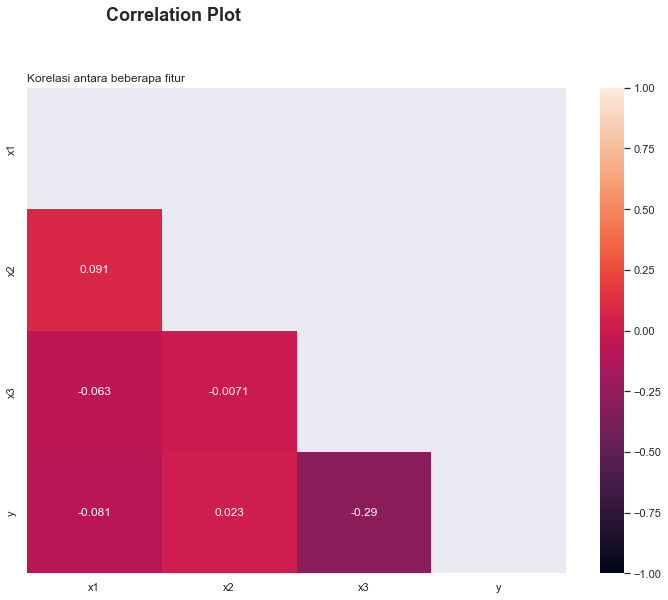

In [1509]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=18, fontweight='bold')
plt.title("Korelasi antara beberapa fitur", loc='left', fontsize=12) 
plt.tight_layout()
plt.show()

dapat dilihat bahwa dataset di atas memiliki variabel yang tidak berkorelasi satu sama lain

<AxesSubplot:xlabel='x3', ylabel='Count'>

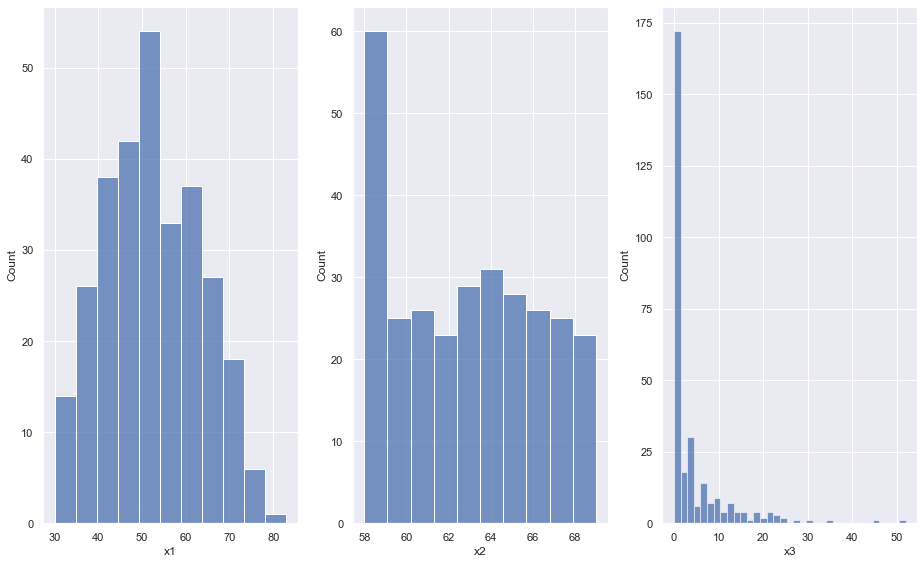

In [1510]:
fig, axs = plt.subplots(ncols=3)
sns.set(rc={'figure.figsize':(50,10)})
sns.histplot(df['x1'], ax=axs[0])
sns.histplot(df['x2'], ax=axs[1])
sns.histplot(df['x3'], ax=axs[2])

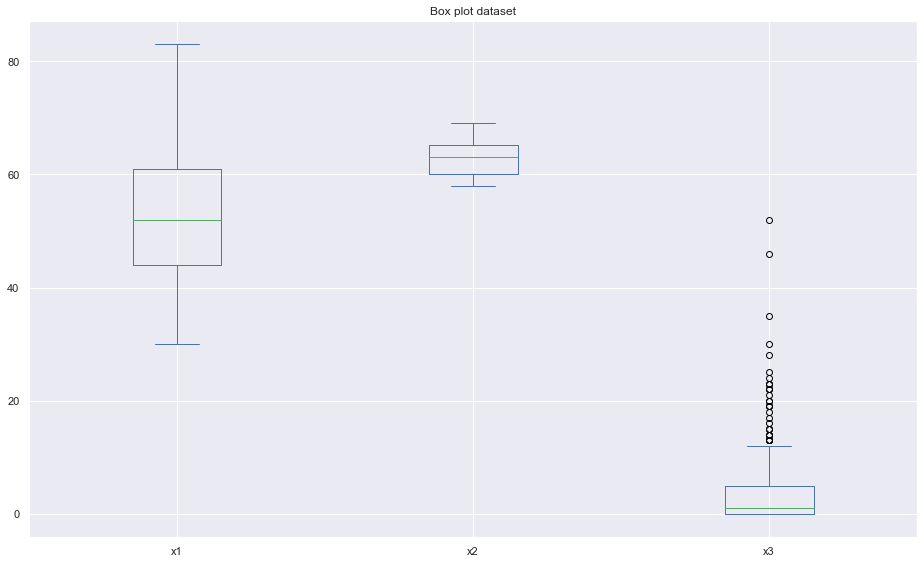

In [1511]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = df[['x1', 'x2', 'x3']].plot(kind='box', title='Box plot dataset')

# Pre-processing

## Normalisasi data

In [1512]:
#normalisasi
def minMaxScaling(df) :
    return (df.iloc[:,:4] - df.iloc[:,:4].min()) / (df.iloc[:,:4].max() - df.iloc[:,:4].min())

# def standardScaling(df) : 
#     return (df.iloc[:,4:] - df.iloc[:,4:].mean() / df.iloc[:,4:].std())

dataNormalized = minMaxScaling(df)
dataNormalized

,x1,x2,x3,y
0,0.566038,0.545455,0.000000,1.0
1,0.452830,0.181818,0.211538,0.0
2,0.660377,0.363636,0.423077,0.0
3,0.075472,0.181818,0.000000,1.0
4,0.150943,1.000000,0.403846,0.0
...,...,...,...,...
291,0.547170,0.545455,0.019231,1.0
292,0.660377,0.818182,0.000000,1.0
293,0.433962,0.636364,0.230769,0.0
294,0.509434,0.545455,0.019231,0.0


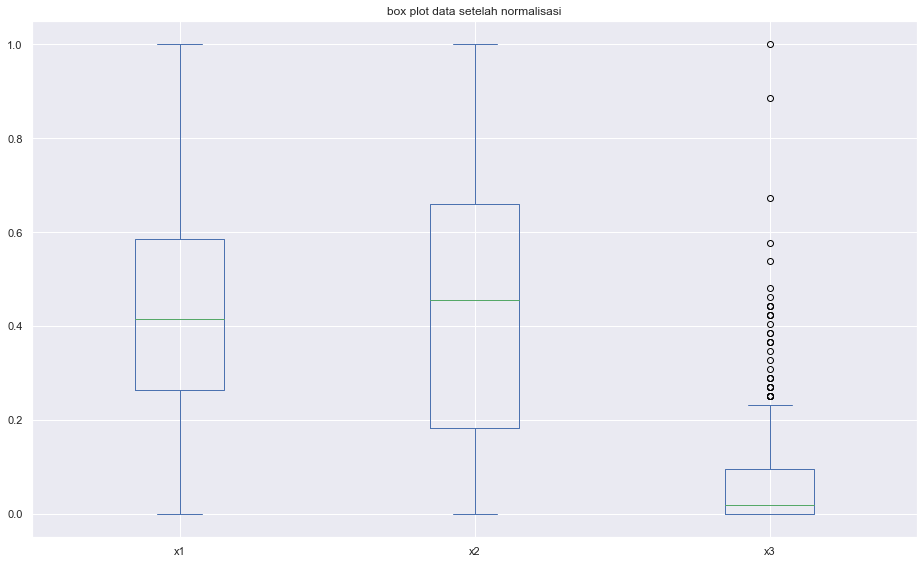

In [1513]:
plt.rcParams["figure.figsize"] = [13, 8]
plt.rcParams["figure.autolayout"] = True
ax = dataNormalized[['x1', 'x2', 'x3']].plot(kind='box', title='box plot data setelah normalisasi')

In [1514]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
outliers = hitungOutliers(dataNormalized["x3"])
percentage = len(outliers)/len(dataNormalized["x3"])*100
print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))
print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")

number of outliers: 34
max outlier value: 1.0
min outlier value: 0.25
Outliers percentage: 11.49%


dapat dilihat kalau outliers terlalu banyak di data x3 sehingga tidak memungkinkan untuk didrop.

# Split dataset

dataset akan dipisah menjadi training set dan validation set untuk menghitung akurasi tiap nilai k

In [1515]:
# Mengubah dataset menjadi array
arrayDf = dataNormalized
arrayDf.to_numpy()
print(arrayDf)

           x1        x2        x3    y
0    0.566038  0.545455  0.000000  1.0
1    0.452830  0.181818  0.211538  0.0
2    0.660377  0.363636  0.423077  0.0
3    0.075472  0.181818  0.000000  1.0
4    0.150943  1.000000  0.403846  0.0
..        ...       ...       ...  ...
291  0.547170  0.545455  0.019231  1.0
292  0.660377  0.818182  0.000000  1.0
293  0.433962  0.636364  0.230769  0.0
294  0.509434  0.545455  0.019231  0.0
295  0.452830  0.090909  0.134615  1.0

[296 rows x 4 columns]


In [1516]:
def splitDependent(df):
    x = df.iloc[:,[0,1,2]].values
    y = df.iloc[:,[3]].values
    return x,y

In [1517]:
x,y = splitDependent(dataNormalized.head(10))
print(x)
print(y)

[[0.56603774 0.54545455 0.        ]
 [0.45283019 0.18181818 0.21153846]
 [0.66037736 0.36363636 0.42307692]
 [0.0754717  0.18181818 0.        ]
 [0.1509434  1.         0.40384615]
 [0.05660377 0.         0.19230769]
 [0.62264151 0.27272727 0.        ]
 [0.50943396 0.54545455 0.        ]
 [0.30188679 0.         0.05769231]
 [0.24528302 0.63636364 0.        ]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [1518]:
def kFolds(arrayDf,k):
    # membagi data menjadi k folds
    folds = np.array_split(arrayDf,k)
    listEuclidean, listManhattan,listMinkowski = [],[],[]
    
    for i in range(k):
        #print("Folds: ",i)
        trainingSet = folds.copy()
        validationSet = folds[i]
        del trainingSet[i]
        trainingSet = pd.concat(trainingSet, sort=False)

        xTrain,yTrain = splitDependent(trainingSet)
        xVal,yVal = splitDependent(validationSet)
        print("training set: \n",trainingSet)
        print("validation set: \n", validationSet)
        hEuclidean, hManhattan, hMinkowski = knn(xTrain,yTrain,xVal,yVal,k)
        listEuclidean.append(hEuclidean)
        listManhattan.append(hManhattan)
        listMinkowski.append(hMinkowski)

    print("Hasil Akurasi Euclidean")
    makePlot(listEuclidean,k)
    print("Hasil Akurasi Manhattan")
    makePlot(listManhattan,k)
    print("Hasil Akurasi Minkowski")
    makePlot(listMinkowski,k)
        
    return 0

In [1519]:
#arrayDf = arrayDf.head(20)

training set: 
            x1        x2        x3    y
12   0.735849  0.181818  0.000000  1.0
13   0.509434  0.272727  0.096154  0.0
14   0.698113  0.272727  0.000000  1.0
15   0.716981  0.818182  0.000000  1.0
16   0.358491  0.272727  0.019231  1.0
..        ...       ...       ...  ...
291  0.547170  0.545455  0.019231  1.0
292  0.660377  0.818182  0.000000  1.0
293  0.433962  0.636364  0.230769  0.0
294  0.509434  0.545455  0.019231  0.0
295  0.452830  0.090909  0.134615  1.0

[284 rows x 4 columns]
validation set: 
           x1        x2        x3    y
0   0.566038  0.545455  0.000000  1.0
1   0.452830  0.181818  0.211538  0.0
2   0.660377  0.363636  0.423077  0.0
3   0.075472  0.181818  0.000000  1.0
4   0.150943  1.000000  0.403846  0.0
5   0.056604  0.000000  0.192308  1.0
6   0.622642  0.272727  0.000000  1.0
7   0.509434  0.545455  0.000000  1.0
8   0.301887  0.000000  0.057692  1.0
9   0.245283  0.636364  0.000000  1.0
10  0.566038  0.090909  0.326923  0.0
11  0.754717  0.09

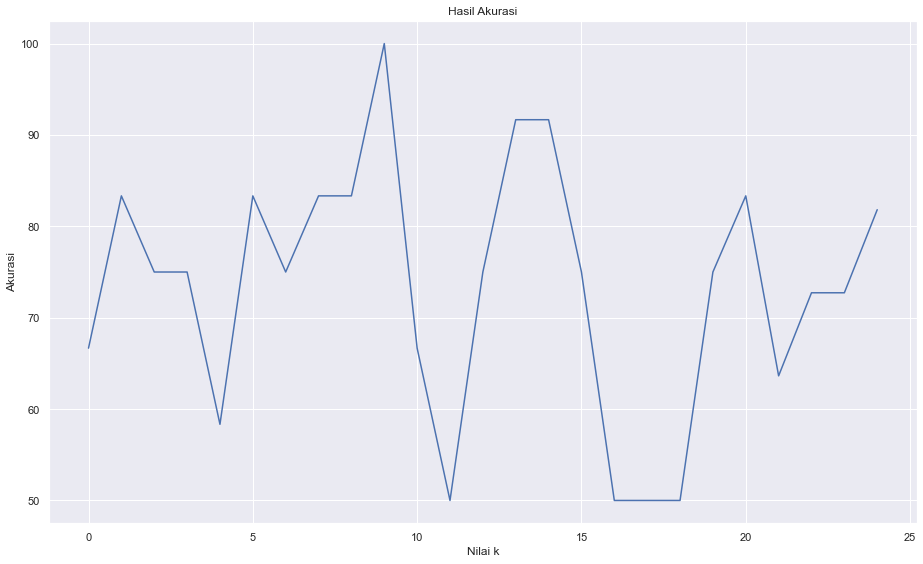

Hasil Akurasi Manhattan


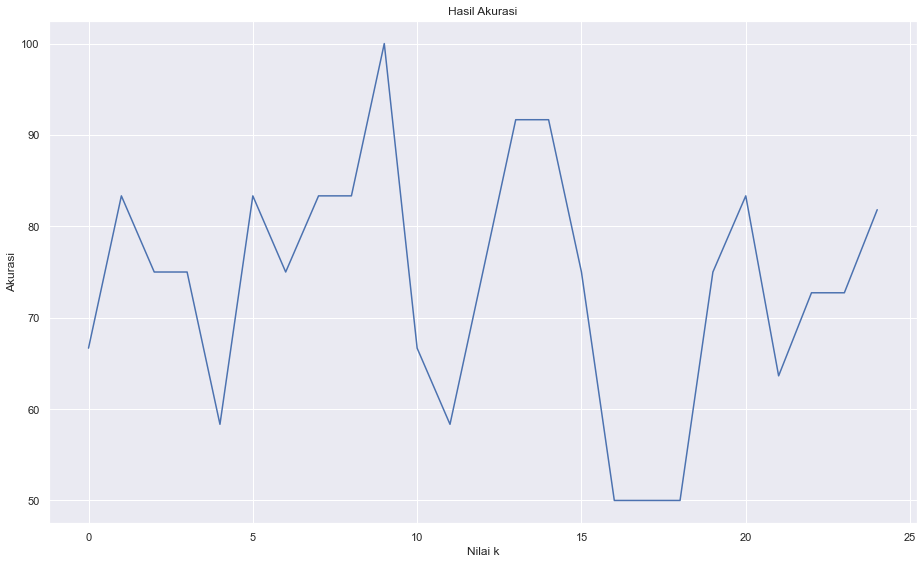

Hasil Akurasi Minkowski


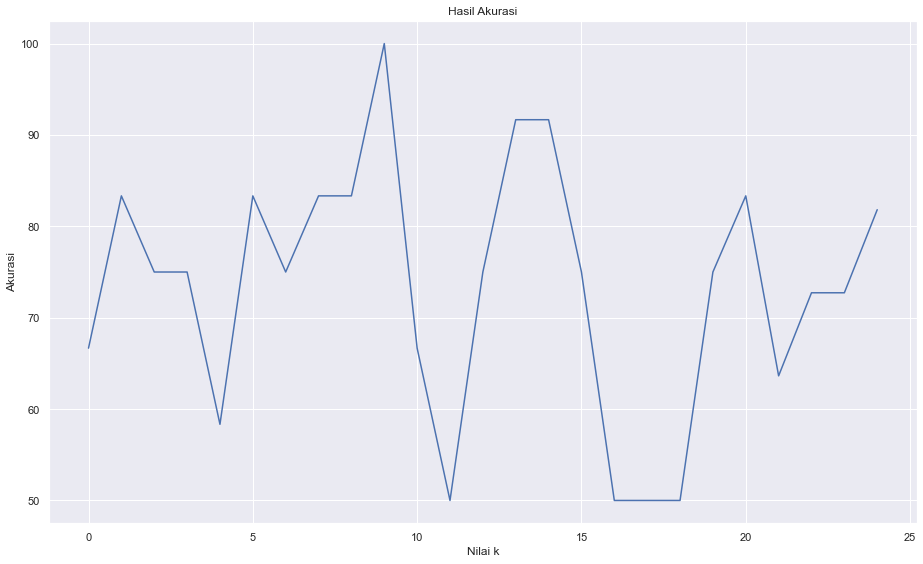

0

In [1520]:
kFolds(arrayDf,25)

dapat dilihat bahwa nilai k terbaik adalah k = 9 dan berlaku untuk semua metode pencarian distance

# Perhitungan jarak

In [1521]:
def euclidean(xTrain,yTrain,xVal):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = (x[0]-j[0])**2 + (x[1]-j[1])**2 + (x[2]-j[2])**2
            #print(x)
            hasilPerTrainingData = [math.sqrt(d),yTrain[indexTraining][0]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining += 1
        resultPerTraining.sort()
        result.append(resultPerTraining)
    return(result)

def manhattan(xTrain,yTrain,xVal):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = abs(x[0]-j[0]) + abs(x[1]-j[1]) + abs(x[2]-j[2])
            #print(x)
            hasilPerTrainingData = [d,yTrain[indexTraining][0]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining += 1
        resultPerTraining.sort()
        result.append(resultPerTraining)
    return(result)

def minkowski(xTrain,yTrain,xVal,h=3):
    result = []
    for x in xVal:
        resultPerTraining = []; indexTraining = 0
        for j in xTrain:
            d = (abs(x[0]-j[0]))**h + (abs(x[1]-j[1]))**h + (abs(x[2]-j[2]))**h
            #print(x)
            hasilPerTrainingData = [d**(1/h),yTrain[indexTraining][0]]
            resultPerTraining.append(hasilPerTrainingData)
            indexTraining += 1
        resultPerTraining.sort()
        result.append(resultPerTraining)
    return(result) 

#def minkowski(xTrain,yTrain,xVal):

In [1522]:
def pilihTetangga(result,k):
    tetangga = []
    for data in result:
        data = data[:k]
        tetangga.append(data)
    return tetangga


In [1523]:
def vote(result):
    count0 = 0; count1 = 0; hasil = []
    for data in result:
        for dataVal in data:
            if dataVal[1] == 0.0:
                count0 += 1
            else:
                count1 += 1
        if count0 > count1:
            hasil.append(0)
        else:
            hasil.append(1)    
    return hasil

    

In [1524]:
def akurasi(hasil,yVal):
    akurasi = 0
    for i in range(len(hasil)):
        if hasil[i] == yVal[i][0]:
                akurasi += 1
    return akurasi

KNN

In [1525]:
def knn(xTrain,yTrain,xVal,yVal,k):
    resultEuclidean = euclidean(xTrain,yTrain,xVal)
    resultManhattan = manhattan(xTrain,yTrain,xVal)
    resultMinkowski = minkowski(xTrain,yTrain,xVal)
    
    resultEuclidean = pilihTetangga(resultEuclidean,k)
    resultManhattan = pilihTetangga(resultManhattan,k)
    resultMinkowski = pilihTetangga(resultMinkowski,k)
    
    finalEuclidean  = vote(resultEuclidean)
    finalManhattan  = vote(resultManhattan) 
    finalMinkowski  = vote(resultMinkowski)
    
    hasilAkurasiEuclidean = (akurasi(finalEuclidean,yVal)/len(yVal))*100
    hasilAkurasiManhattan = (akurasi(finalManhattan,yVal)/len(yVal))*100
    hasilAkurasiMinkowski = (akurasi(finalMinkowski,yVal)/len(yVal))*100
    #print(hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski)
    #print(str(hasilAkurasiEuclidean)+"%")
    return hasilAkurasiEuclidean,hasilAkurasiManhattan,hasilAkurasiMinkowski

In [1526]:
def makePlot(akurasiList,k):
    listAngka = []
    for i in range(k):
        listAngka.append(i)
    plt.plot(listAngka,akurasiList)
    plt.title("Hasil Akurasi")
    plt.xlabel("Nilai k")
    plt.ylabel("Akurasi")
    plt.show()

In [1527]:
dfTest = pd.read_excel("https://github.com/khalilullahalfaath/AI_Tubes-03-Learning/blob/19d11d6e2fa2d540afdc0cec3308b82c664d29f7/traintest.xlsx?raw=true","test")

In [1528]:
dfTest

,id,x1,x2,x3,y
0,297,43,59,2,?
1,298,67,66,0,?
2,299,58,60,3,?
3,300,49,63,3,?
4,301,45,60,0,?
5,302,54,58,1,?
6,303,56,66,3,?
7,304,42,69,1,?
8,305,50,59,2,?
9,306,59,60,0,?


In [1529]:
dataTestNormalized = minMaxScaling(dfTest)

In [1530]:
dataTestNormalized

,id,x1,x2,x3
0,0.000000,0.04,0.090909,0.666667
1,0.111111,1.00,0.727273,0.000000
2,0.222222,0.64,0.181818,1.000000
3,0.333333,0.28,0.454545,1.000000
4,0.444444,0.12,0.181818,0.000000
5,0.555556,0.48,0.000000,0.333333
6,0.666667,0.56,0.727273,1.000000
7,0.777778,0.00,1.000000,0.333333
8,0.888889,0.32,0.090909,0.666667
9,1.000000,0.68,0.181818,0.000000


In [1532]:
xTrain,yTrain = splitDependent(dataNormalized)
xTest,yTest = splitDependent(dataTestNormalized)

resultEuclidean = euclidean(xTrain,yTrain,xTest)
resultManhattan = manhattan(xTrain,yTrain,xTest)
resultMinkowski = minkowski(xTrain,yTrain,xTest)

resultEuclidean = pilihTetangga(resultEuclidean,9)
resultManhattan = pilihTetangga(resultManhattan,9)
resultMinkowski = pilihTetangga(resultMinkowski,9)

finalEuclidean  = vote(resultEuclidean)
finalManhattan  = vote(resultManhattan) 
finalMinkowski  = vote(resultMinkowski)

print(finalEuclidean)
print(finalManhattan)
print(finalMinkowski)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
